# Machine Learning Task

In [1]:
# Importing necassary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
# numerical features
numericals_df = df.select_dtypes(include=np.number)
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


In [4]:
# categorical features
categorical_df = df.select_dtypes(include= object)
categorical_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


# Predictive Modelling

In [5]:
# First Using Just the Numerical to for my model!

In [6]:
#1. X-y split (y is the target variable, which is the total claim amount)

# X Y SPLIT

X=numericals_df.drop('total_claim_amount', axis=1)
y=numericals_df.total_claim_amount

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

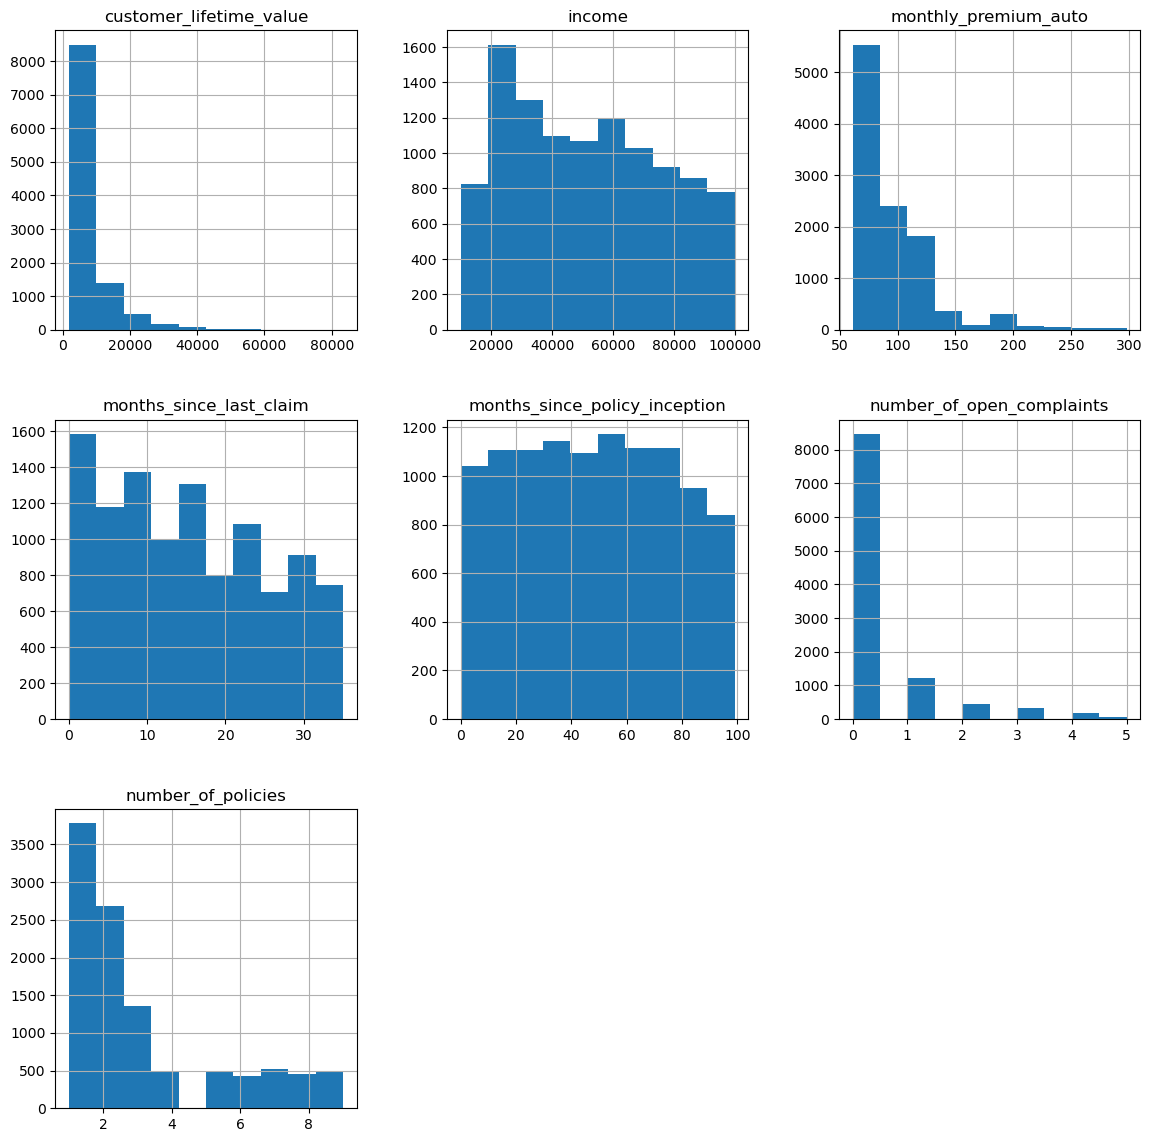

In [7]:
## histogram Visualization of the Variable(input) features.
X.hist(figsize=(14,14))

In [8]:
#2. Train-test split.

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=30,random_state=100)

In [9]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1381,8238,68261,102,11,81,0,4
10610,2483,87492,62,15,69,0,1
6278,5945,65602,73,11,14,0,3
8689,16570,23589,211,30,13,0,6
6330,2567,61900,64,11,64,0,1
...,...,...,...,...,...,...,...
350,2476,47918,62,2,51,0,1
79,9312,75986,115,11,44,0,3
8039,6945,15850,61,28,14,0,2
6936,8718,89096,111,1,50,0,3


In [10]:
y_train

1381       84
10610     264
6278       61
8689     1012
6330      307
         ... 
350       246
79         89
8039      314
6936       64
5640      774
Name: total_claim_amount, Length: 10659, dtype: int64

In [11]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
9700,2690,60060,67,24,12,0,1
4662,10628,90874,137,18,28,4,3
1401,9259,92090,127,11,86,0,3
6313,9388,33599,80,23,31,0,2
8906,10056,16097,139,7,6,0,7
9778,4584,85245,115,6,96,0,1
7968,3700,36710,94,17,56,0,1
7296,8365,26630,118,19,27,0,8
3080,2534,94003,64,14,39,0,1
425,4605,22571,63,29,51,0,9


In [12]:
#.3 Standardize the data (after the data split)

In [13]:
# STANDARDIZE

In [14]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [15]:
X_test_scaled=std_scaler.transform(X_test)

In [16]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.03235556  0.6656257   0.25552629 ...  1.17763725 -0.42327265
   0.42495411]
 [-0.80372858  1.44197044 -0.90598409 ...  0.74812706 -0.42327265
  -0.82573687]
 [-0.30077058  0.55828335 -0.58656874 ... -1.22046134 -0.42327265
   0.00805711]
 ...
 [-0.15549097 -1.45017712 -0.93502185 ... -1.22046134 -0.42327265
  -0.40883988]
 [ 0.10208978  1.50672302  0.51686613 ...  0.06806925 -0.42327265
   0.00805711]
 [-0.55486461  1.06338581 -0.84790857 ...  0.96288215  0.67579268
   1.67564509]]
--------
[[-0.7736557   0.33455591 -0.76079529  0.87761814 -1.29204637 -0.42327265
  -0.82573687]
 [ 0.37957383  1.57849989  1.27184788  0.28290554 -0.71936611  3.97298868
   0.00805711]
 [ 0.18068604  1.62758913  0.98147028 -0.41092581  1.35659983 -0.42327265
   0.00805711]
 [ 0.19942711 -0.73365989 -0.38330442  0.77849937 -0.61198856 -0.42327265
  -0.40883988]
 [ 0.29647389 -1.44020587  1.32992339 -0.80740087 -1.50680147 -0.42327265
   1.67564509]
 [-0.49849612  1.3512603   0.63301717 -0.90651964  1.7

In [17]:
#Predictive Modelling
#4. Apply linear regression.

In [18]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

### Modeling using statsmodel

In [19]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1057.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:02:21   Log-Likelihood:                -72847.
No. Observations:               10659   AIC:                         1.457e+05
Df Residuals:                   10651   BIC:                         1.458e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.2813      2.179    199.336      0.0

In [20]:
#display adjusted R-squared
print(model.rsquared_adj)

0.4095486657906846


### Modelling Using Scikit Laern

In [21]:
model=LinearRegression()    # model
model.fit(X_train_scaled,y_train)   # model train

LinearRegression()

In [22]:
#checking the model paremeters

In [23]:
model.coef_

array([ -7.53438604, -31.88194581, 187.50412937,   1.43800438,
        -2.12587687,  -1.04104794,   1.09549154])

In [24]:
model.intercept_

434.2812646589736

In [25]:
model.score(X_test_scaled,y_test)

0.30558145862603403

In [26]:
y_pred=model.predict(X_test_scaled)   # model prediction

In [27]:
y_pred

array([290.33654246, 617.3813475 , 562.03352436, 386.71131166,
       731.64874006, 508.2372627 , 461.94495138, 606.1736409 ,
       227.00687023, 316.11084838, 513.77639088, 376.91189918,
       360.5787206 , 365.62501344, 525.5774458 , 306.73261057,
       403.8044049 , 351.56444107, 577.64528861, 497.30327858,
       270.33102055, 359.17063237, 335.99595487, 623.95941711,
       449.98830858, 450.03915538, 401.47420121, 332.62399525,
       293.93476097, 286.90488158])

In [28]:
y_test

9700      320
4662      459
1401       22
6313      111
8906     1000
9778      556
7968      676
7296      581
3080      307
425       302
8221      694
108       319
7803      525
1547      326
6307      710
3384      302
9636      178
5046      336
10104     578
914       369
9568      357
196       648
2688       56
707       771
4391       77
5540      360
8864      529
51        321
2054      340
557       321
Name: total_claim_amount, dtype: int64

### Evaluating Model Performance

In [29]:
result=pd.DataFrame({"y_test": list(y_test),"y_pred": list(y_pred)})

In [30]:
result

,y_test,y_pred
0,320,290.336542
1,459,617.381347
2,22,562.033524
3,111,386.711312
4,1000,731.648740
5,556,508.237263
6,676,461.944951
7,581,606.173641
8,307,227.006870
9,302,316.110848


<AxesSubplot:ylabel='total_claim_amount'>

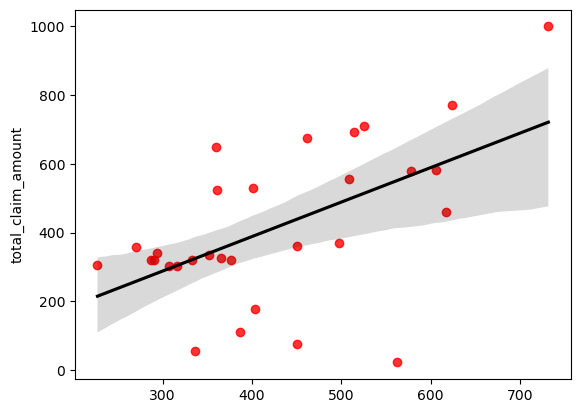

In [31]:
#Visualizing the y test and y pred
import seaborn as sns

sns.regplot(x=y_pred,y=y_test,scatter_kws={"color": "red"}, line_kws={"color": "black"})

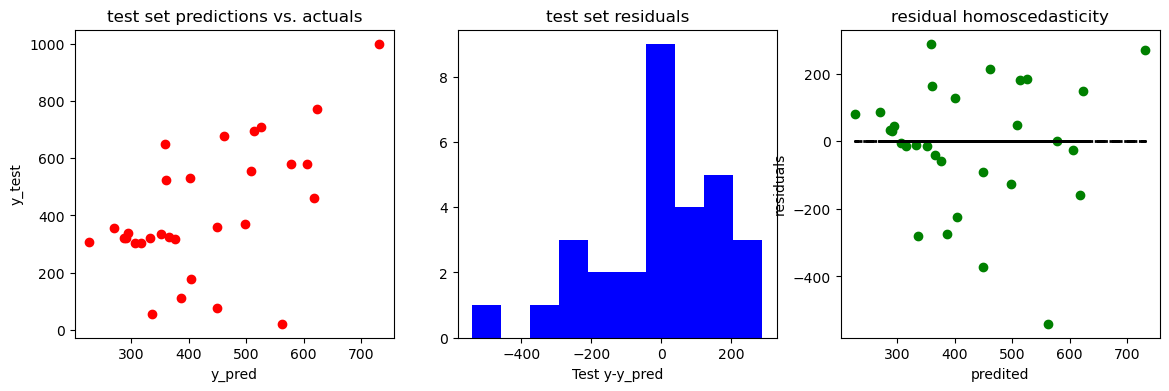

In [32]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

# forms a line?
ax[0].plot(y_pred, y_test, 'o', color='red')
ax[0].set_xlabel("y_pred")
ax[0].set_ylabel("y_test")
ax[0].set_title("test set predictions vs. actuals")

# normal distribution?
ax[1].hist(y_test - y_pred, color='blue')
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("test set residuals")

# constant?
ax[2].plot(y_pred,y_test - y_pred,"o", color='green')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("residual homoscedasticity")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='black',linewidth=2)

### Feature Importance

In [33]:
features_importances = pd.DataFrame(data={
    'Attribute': X_test.columns,
    'Importance': abs(model.coef_.reshape(len(X_test.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.504129
1,income,31.881946
0,customer_lifetime_value,7.534386
4,months_since_policy_inception,2.125877
3,months_since_last_claim,1.438004
6,number_of_policies,1.095492
5,number_of_open_complaints,1.041048


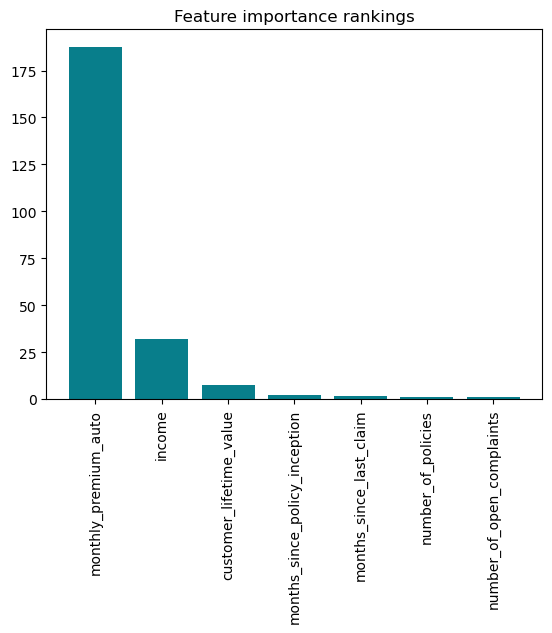

In [34]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

## Rerun the Model by first taking out the Outliner.

In [35]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [36]:
numericals_df = df.select_dtypes(include=np.number)

In [37]:
categorical_df = df.select_dtypes(include= object)

In [38]:
# Removing the outlier

def remove_outlier(column_name,df):
    sorted(column_name)
    Q1,Q3 = np.percentile(column_name, [15,85])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    outliers = df[(column_name < lower_range) | (column_name > upper_range)]
    
    print(outliers)
    return df.drop(outliers.index, inplace=True)

In [39]:
remove_outlier(numericals_df['total_claim_amount'],numericals_df)

       customer_lifetime_value  income  monthly_premium_auto  \
55                       19435   38688                   249   
74                       26346   48268                   223   
77                       74228   88140                   242   
99                       16320   96619                   247   
208                      13057   43171                   190   
...                        ...     ...                   ...   
10161                    12767   28063                   189   
10292                    13021   80557                   223   
10368                     7469   80907                   199   
10396                    20714   81377                   203   
10679                     6423   94780                   188   

       months_since_last_claim  months_since_policy_inception  \
55                          22                              6   
74                          28                             26   
77                           1      

In [40]:
numericals_df.shape

(10582, 8)

In [41]:
#1. X-y split (y is the target variable, which is the total claim amount)

# X Y SPLIT

X=numericals_df.drop('total_claim_amount', axis=1)
y=numericals_df.total_claim_amount

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

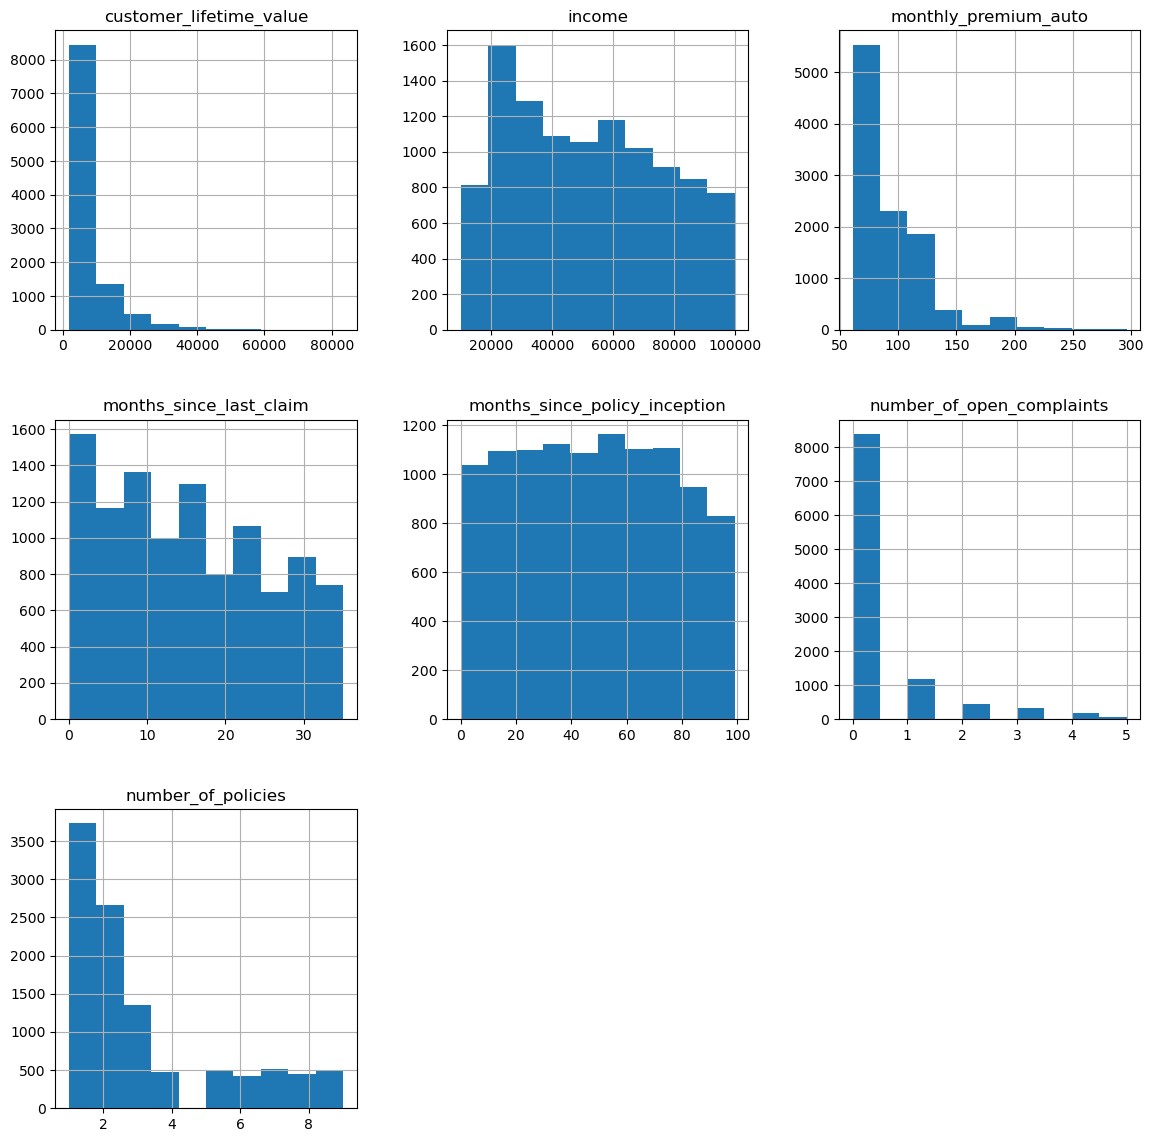

In [42]:
## histogram Visualization of the Variable(input) features.
X.hist(figsize=(14,14))

In [43]:
#2. Train-test split.

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=30,random_state=100)

In [44]:
#.3 Standardize the data (after the data split)
# standardize

In [45]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [46]:
X_test_scaled=std_scaler.transform(X_test)

In [47]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 2.28911758 -0.35888297 -0.83565436 ... -0.6842323  -0.4226232
  -0.40966428]
 [-0.45305349  0.62183896 -0.95914553 ... -0.25484624  1.7752674
   0.84089816]
 [-0.77314093 -0.81600972 -0.68129041 ... -0.07593538 -0.4226232
  -0.82651843]
 ...
 [-0.7490531  -0.46748437 -0.58867204 ...  1.06909411 -0.4226232
  -0.82651843]
 [-0.4956136   1.27296309  0.64623961 ... -0.72001448 -0.4226232
  -0.82651843]
 [-0.15262054  0.20280946  0.12140216 ...  0.24610416 -0.4226232
   0.84089816]]
--------
[[-8.12154361e-01 -1.25864822e+00 -6.19544826e-01  8.81541334e-01
   9.97529769e-01  3.97315801e+00 -8.26518430e-01]
 [-5.66990435e-01 -1.05560408e-01  6.77112400e-01 -8.05423650e-01
   1.49848017e+00 -4.22623203e-01 -8.26518430e-01]
 [-6.59203992e-01 -7.04139380e-01 -2.08900425e-03  1.77464044e+00
   4.96579364e-01  1.77526740e+00 -8.26518430e-01]
 [-4.42709023e-01  1.58908156e+00 -7.12163199e-01  1.17924104e+00
   2.81886334e-01 -4.22623203e-01  1.67460646e+00]
 [-5.12903638e-01  1.33874543e+00  6.

In [48]:
#Predictive Modelling
#4. Apply linear regression.

In [49]:
# Modeling using statsmodel
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     803.4
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:02:22   Log-Likelihood:                -71337.
No. Observations:               10552   AIC:                         1.427e+05
Df Residuals:                   10544   BIC:                         1.427e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.6782      2.034    206.844      0.0

In [50]:
#display adjusted R-squared
print(model.rsquared_adj)

0.34741666843439445


## Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables

In [51]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [52]:
numericals_df = df.select_dtypes(include=np.number)
numericals_df.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292


In [53]:
categorical_df = df.select_dtypes(include= object)

In [54]:
categorical_df.drop(['effective_to_date'], axis=1, inplace=True)

In [55]:
# Removing the outlier

def remove_outlier(column_name,df):
    sorted(column_name)
    Q1,Q3 = np.percentile(column_name, [15,85])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    outliers = df[(column_name < lower_range) | (column_name > upper_range)]
    
    print(outliers)
    return df.drop(outliers.index, inplace=True)

In [56]:
categorical_df = pd.get_dummies(categorical_df, prefix="dmy",drop_first=True)
categorical_df

,dmy_east,dmy_north west,dmy_west region,dmy_yes,dmy_extended,dmy_premium,dmy_college,dmy_doctor,dmy_high school or below,dmy_master,...,dmy_branch,dmy_call center,dmy_web,dmy_luxury car,dmy_luxury suv,dmy_sports car,dmy_suv,dmy_two-door car,dmy_medsize,dmy_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [57]:
remove_outlier(numericals_df['total_claim_amount'], numericals_df)

       customer_lifetime_value  income  monthly_premium_auto  \
55                       19435   38688                   249   
74                       26346   48268                   223   
77                       74228   88140                   242   
99                       16320   96619                   247   
208                      13057   43171                   190   
...                        ...     ...                   ...   
10161                    12767   28063                   189   
10292                    13021   80557                   223   
10368                     7469   80907                   199   
10396                    20714   81377                   203   
10679                     6423   94780                   188   

       months_since_last_claim  months_since_policy_inception  \
55                          22                              6   
74                          28                             26   
77                           1      

In [58]:
numericals_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [59]:
categorical_df = categorical_df[categorical_df.index.isin(numericals_df.index)]

In [60]:
categorical_df

,dmy_east,dmy_north west,dmy_west region,dmy_yes,dmy_extended,dmy_premium,dmy_college,dmy_doctor,dmy_high school or below,dmy_master,...,dmy_branch,dmy_call center,dmy_web,dmy_luxury car,dmy_luxury suv,dmy_sports car,dmy_suv,dmy_two-door car,dmy_medsize,dmy_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [61]:
stacked1_df = pd.concat([numericals_df,categorical_df],axis=1)
stacked1_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,dmy_east,dmy_north west,...,dmy_branch,dmy_call center,dmy_web,dmy_luxury car,dmy_luxury suv,dmy_sports car,dmy_suv,dmy_two-door car,dmy_medsize,dmy_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [62]:
#1. X-y split (y is the target variable, which is the total claim amount)

# X Y SPLIT

X=stacked1_df.drop('total_claim_amount', axis=1)
y=stacked1_df.total_claim_amount

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'dmy_east'}>,
        <AxesSubplot:title={'center':'dmy_north west'}>,
        <AxesSubplot:title={'center':'dmy_west region'}>,
        <AxesSubplot:title={'center':'dmy_yes'}>,
        <AxesSubplot:title={'center':'dmy_extended'}>,
        <AxesSubplot:title={'center':'dmy_premium'}>,
        <AxesSubplot:title={'center':'dmy_college'}>],
       [<AxesSubplot:title={'center':'dmy_doctor'}>,
        <AxesSubplot:title={'center':'dmy_high school or below'}>,
        <AxesSubplot:title={'center':'dmy_master'}>,
 

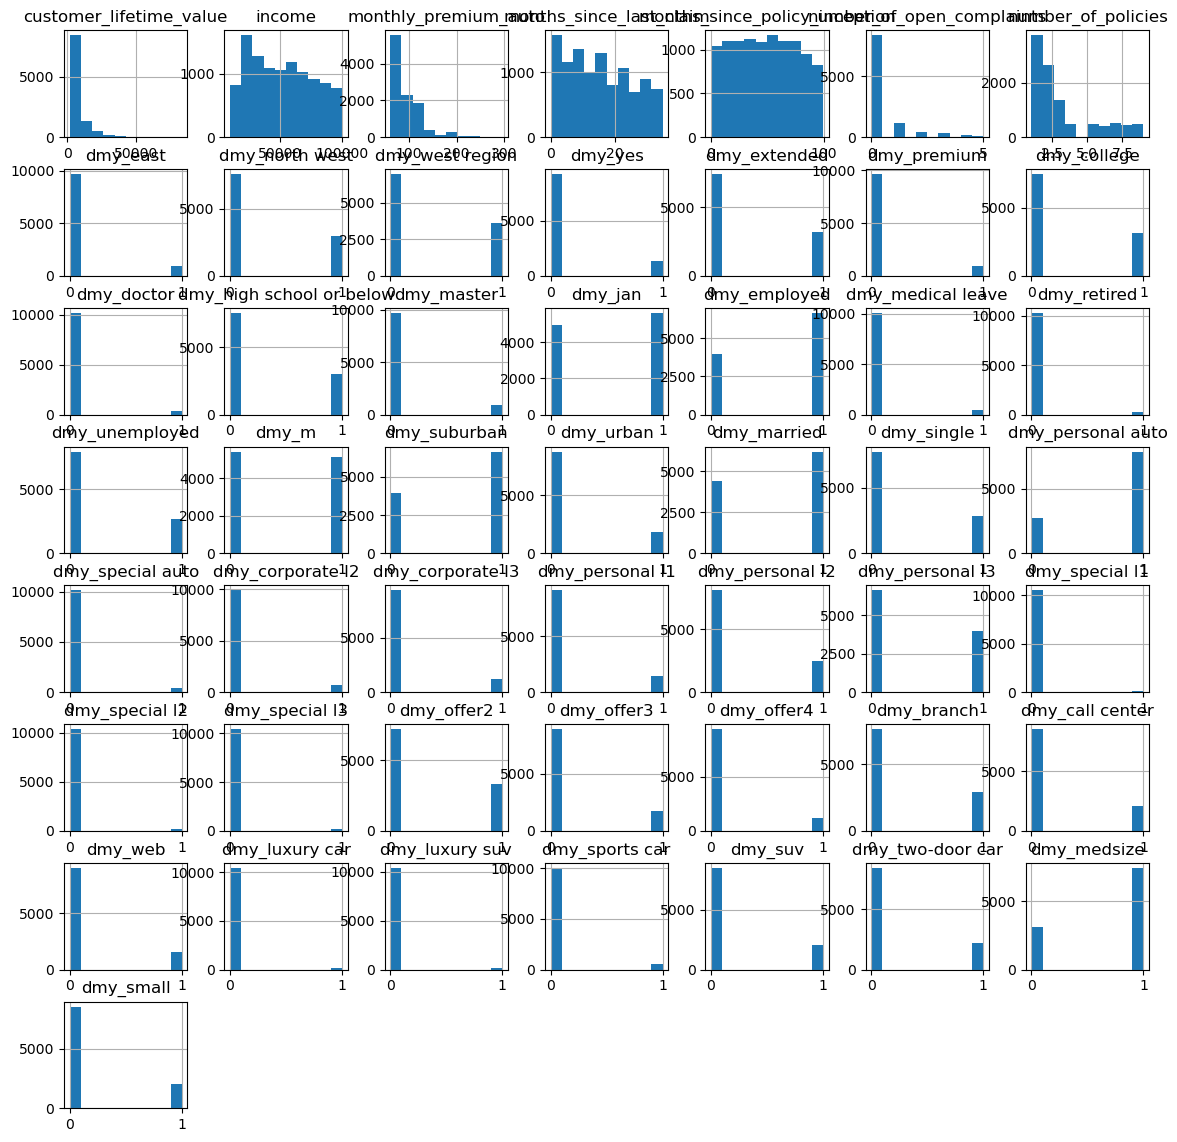

In [63]:
## histogram Visualization of the Variable(input) features.
X.hist(figsize=(14,14))

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=123)

In [65]:
#.3 Standardize the data (after the data split)
# standardize

In [66]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [67]:
X_test_scaled=std_scaler.transform(X_test)

In [68]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 4.71690679 -1.41800887  0.76820268 ... -0.51409944  0.64332005
  -0.48078176]
 [ 0.10292182  1.08525899  0.52154361 ... -0.51409944 -1.55443625
  -0.48078176]
 [ 0.21112694  0.57949105  0.76820268 ... -0.51409944  0.64332005
  -0.48078176]
 ...
 [-0.76701772  1.11577635 -0.71175175 ...  1.94514899  0.64332005
  -0.48078176]
 [ 0.78164956 -0.90098287  0.76820268 ... -0.51409944  0.64332005
  -0.48078176]
 [-0.42728328  1.07846396 -0.89674606 ... -0.51409944  0.64332005
  -0.48078176]]
--------
[[-0.11319197 -1.50867639 -0.83508129 ... -0.51409944  0.64332005
  -0.48078176]
 [-0.79547714 -0.20153624 -0.8042489  ... -0.51409944  0.64332005
  -0.48078176]
 [ 1.49595159 -0.43614599 -0.89674606 ... -0.51409944  0.64332005
  -0.48078176]
 ...
 [ 2.69584263  0.10673332  0.58320837 ... -0.51409944 -1.55443625
   2.07994579]
 [-0.57788109 -1.36087426  0.79903506 ... -0.51409944 -1.55443625
   2.07994579]
 [ 0.19689723  0.02338353  0.82986744 ...  1.94514899 -1.55443625
   2.07994579]]


In [69]:
#Predictive Modelling
#4. Apply linear regression.

In [70]:
# Modeling using statsmodel
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant

predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     581.3
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:02:24   Log-Likelihood:                -49369.
No. Observations:                7936   AIC:                         9.884e+04
Df Residuals:                    7887   BIC:                         9.918e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.2433      1.371    307.263      0.0

In [71]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7782763451629364
